In [1]:
import numpy as numpyp
import pandas as pd
import statsmodels.api
import statsmodels.formula.api as smf
import seaborn
import matplotlib.pyplot as plt
import scipy
%pylab inline


# bug fix for display formats to avoid run time errors
pd.set_option('display.float_format', lambda x:'%.2f'%x)

#call in data set
df = pd.read_csv('gapminder.csv')

Populating the interactive namespace from numpy and matplotlib


In [19]:
# Prepare Data for Regression
x = 'urbanrate'
y = 'lifeexpectancy'

# convert variables to numeric format using convert_objects function
data = df[[x, y]]
data[x] = pd.to_numeric(data[x], errors='coerce')
data[y] = pd.to_numeric(data[y], errors='coerce')
data = data.dropna()

# centering explanatory variable
meanx = np.mean(data[x])
data[x] = data[x].apply(lambda x: x-meanx)

/Users/barantoppare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/barantoppare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Axes(0.125,0.125;0.775x0.775)


OLS regression model for the association between urbanrate and lifeexpectancy
                            OLS Regression Results                            
Dep. Variable:         lifeexpectancy   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     115.4
Date:                Sun, 14 Feb 2016   Prob (F-statistic):           3.03e-21
Time:                        18:45:59   Log-Likelihood:                -648.22
No. Observations:                 188   AIC:                             1300.
Df Residuals:                     186   BIC:                             1307.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------

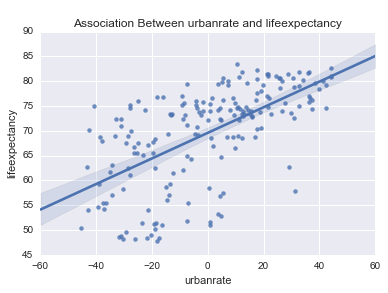

In [24]:
scat1 = seaborn.regplot(x=x, y=y, scatter=True, data=data)
plt.xlabel(x)
plt.ylabel(y)
plt.title ('\nAssociation Between %s and %s' %(x, y))
print(scat1)

print ("\n\nOLS regression model for the association between %s and %s" %(x, y))
reg1 = smf.ols('%s ~ %s' %(y, x), data=data).fit()
print (reg1.summary())


pearson = scipy.stats.pearsonr(data[x], data[y])
print '\n\nPEARSON CORR BETWEEN %s and %s is: %s' %(x, y, pearson)

/Users/barantoppare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/barantoppare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


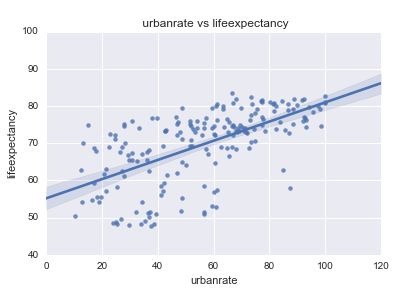

In [18]:
xs = ['urbanrate']
#xs = list(df.columns)[1:]
y = 'lifeexpectancy'
if y in xs: xs.pop(y)

for x in xs:
    data = df[[x, y]]
    data[x] = pd.to_numeric(data[x], errors='coerce')
    data[y] = pd.to_numeric(data[y], errors='coerce')
    data = data.dropna()
    scat1 = seaborn.regplot(x=x, y=y, scatter=True, data=data)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title ('\n %s vs %s' %(x, y))
    plt.show()


In [23]:
data.describe()

,urbanrate,lifeexpectancy
count,188.00,188.00
mean,0.00,69.60
std,23.29,9.71
min,-45.53,47.79
25%,-19.19,63.95
50%,1.30,73.13
75%,17.53,76.24
max,44.07,83.39
